<a href="https://colab.research.google.com/github/Mrinal98-py/Cat-Dog-Classification/blob/main/Project_Dog_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing Libraries

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import applications
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

In [ ]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

#File Reading

In [ ]:
filenames_train=os.listdir("/content/drive/MyDrive/DevTown/train")
filenames_test=os.listdir("/content/drive/MyDrive/DevTown/test")

In [ ]:
#data splitting
categories_train=[]
for f_name in filenames_train:
    category=f_name.split('.')[0]
    if category=='dog':
        categories_train.append(1)
    else:
        categories_train.append(0)

df_train=pd.DataFrame({'filename':filenames_train,'category':categories_train})

categories_test=[]
for f_name in filenames_test:
    category=f_name.split('.')[0]
    if category=='dog':
        categories_test.append(1)
    else:
        categories_test.append(0)

df_test=pd.DataFrame({'filename':filenames_test,'category':categories_test})

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

#Model Training / Testing

In [ ]:
#splitting data for testing
df_train["category"] = df_train["category"].replace({0:'cat',1:'dog'})
df_test["category"] = df_test["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df_train,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [ ]:
df_test.category[df_test.category=='dog']

Series([], Name: category, dtype: object)

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/content/drive/MyDrive/DevTown/train",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/MyDrive/DevTown/train", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20040 validated image filenames belonging to 2 classes.
Found 5010 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 20040 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
test_filenames = os.listdir("/content/drive/MyDrive/DevTown/test")
test_df = pd.DataFrame({'filename': test_filenames})

In [ ]:
test_df.head()

,filename
0,9090.jpg
1,9089.jpg
2,9102.jpg
3,910.jpg
4,9094.jpg


In [ ]:
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = test_datagen.flow_from_dataframe(df_test,
                                                 "/content/drive/MyDrive/DevTown/test",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 12500 validated image filenames belonging to 1 classes.


In [ ]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<ipython-input-18-f7b6d0c9c94b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
1336/1336 [==============================] - ETA: 0s - loss: 0.7358 - accuracy: 0.6386

1336/1336 [==============================] - 6668s 5s/step - loss: 0.7358 - accuracy: 0.6386 - val_loss: 0.6920 - val_accuracy: 0.6439 - lr: 0.0010
Epoch 2/10
1336/1336 [==============================] - ETA: 0s - loss: 0.5648 - accuracy: 0.7118

1336/1336 [==============================] - 1411s 1s/step - loss: 0.5648 - accuracy: 0.7118 - val_loss: 0.7173 - val_accuracy: 0.6359 - lr: 0.0010
Epoch 3/10
1336/1336 [==============================] - ETA: 0s - loss: 0.5053 - accuracy: 0.7598

1336/1336 [==============================] - 1394s 1s/step - loss: 0.5053 - accuracy: 0.7598 - val_loss: 0.6256 - val_accuracy: 0.7563 - lr: 0.0010
Epoch 4/10
1336/1336 [==============================] - ETA: 0s - loss: 0.4700 - accuracy: 0.7833

1336/1336 [==============================] - 1377s 1s/step - loss: 0.4700 - accuracy: 0.7833 - val_loss: 0.5397 - val_accuracy: 0.7591 - lr: 0.0010
Epoch 5/10
1336/1336 [==============================] - ETA: 0s - loss: 0.4358 - accuracy: 0.8020

1336/1336 [==============================] - 1462s 1s/step - loss: 0.4358 - accuracy: 0.8020 - val_loss: 0.3891 - val_accuracy: 0.8220 - lr: 0.0010
Epoch 6/10
1336/1336 [==============================] - ETA: 0s - loss: 0.4187 - accuracy: 0.8123

1336/1336 [==============================] - 1413s 1s/step - loss: 0.4187 - accuracy: 0.8123 - val_loss: 0.5027 - val_accuracy: 0.8072 - lr: 0.0010
Epoch 7/10
1336/1336 [==============================] - ETA: 0s - loss: 0.3988 - accuracy: 0.8206

1336/1336 [==============================] - 1383s 1s/step - loss: 0.3988 - accuracy: 0.8206 - val_loss: 0.3451 - val_accuracy: 0.8507 - lr: 0.0010
Epoch 8/10
1336/1336 [==============================] - ETA: 0s - loss: 0.3838 - accuracy: 0.8291

1336/1336 [==============================] - 1386s 1s/step - loss: 0.3838 - accuracy: 0.8291 - val_loss: 0.3332 - val_accuracy: 0.8533 - lr: 0.0010
Epoch 9/10
1336/1336 [==============================] - ETA: 0s - loss: 0.3794 - accuracy: 0.8325

1336/1336 [==============================] - 1391s 1s/step - loss: 0.3794 - accuracy: 0.8325 - val_loss: 0.4925 - val_accuracy: 0.7571 - lr: 0.0010
Epoch 10/10
1336/1336 [==============================] - ETA: 0s - loss: 0.3695 - accuracy: 0.8392

1336/1336 [==============================] - 1362s 1s/step - loss: 0.3695 - accuracy: 0.8392 - val_loss: 0.4176 - val_accuracy: 0.8168 - lr: 0.0010


In [ ]:
model.save("model_cats-dogs.h5") #saving the model

#Visualisation

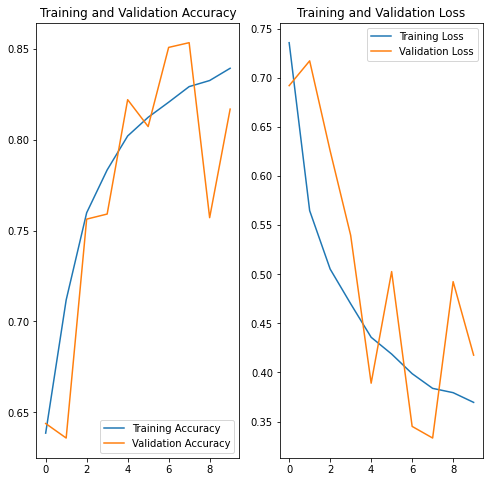

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
nb_samples = test_df.shape[0]

#Running testing data on the trained Model

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

<ipython-input-53-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

#test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

In [ ]:
test_df.head()

,filename,category
0,9090.jpg,cat
1,9089.jpg,dog
2,9102.jpg,cat
3,910.jpg,dog
4,9094.jpg,cat


#Extracting pickle file

In [ ]:
test_df.to_pickle("Dog-Cat Prediction.pkl")